Untuk mengambil dataset pada kaggle maka terlebih dahulu melakukan import kaggle

In [1]:
import kaggle

Membuat sebuah variabel bernama 'dataset_name' yang nilainya berisi dataset yang akan diambil

In [2]:
dataset_name = 'nikkiperry/2023-air-quality-data-for-cbsas'

Download dataset dari kaggle yang sesuai dengan 'dataset_name'. 

In [3]:
kaggle.api.dataset_download_files(dataset_name, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/nikkiperry/2023-air-quality-data-for-cbsas


Untuk manipulasi dan analisis data akan menggunakan library pandas

In [4]:
import pandas as pd

Buat variabel df (Data Frame) yang berfungsi untuk membaca dataset yang sudah didownload

In [5]:
df = pd.read_csv('aqidataset.csv')

Print(df) untuk memastikan apakah dataset sudah berhasil dibaca.

In [6]:
print(df)

       Unnamed: 0        Date  Overall AQI Value Main Pollutant  \
0               0  01/01/2023                 28          Ozone   
1               1  01/02/2023                 26          Ozone   
2               2  01/03/2023                 21          Ozone   
3               3  01/04/2023                 25          Ozone   
4               4  01/05/2023                 31          Ozone   
...           ...         ...                ...            ...   
10919       10919  12/27/2023                 54          PM2.5   
10920       10920  12/28/2023                 41          PM2.5   
10921       10921  12/29/2023                 41          Ozone   
10922       10922  12/30/2023                 42          Ozone   
10923       10923  12/31/2023                 60          PM2.5   

                          Site Name (of Overall AQI) Site ID (of Overall AQI)  \
0                                   Connecticut Hill              36-109-9991   
1                                

Import simple imputer untuk mengatasi nilai data yang kosong dengan menggunakan mean (rata-rata)

In [7]:
from sklearn.impute import SimpleImputer

import numpy yang akan digunakan untuk menandai data yang kosong(hilang).

In [8]:
import numpy as np

Mengubah atribut-atribut yang memiliki data kosong untuk digantikan dengan NaN(Not a Number).

In [9]:
df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']] = df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']].replace('.', np.nan)

Mengisi nilai yang kosong dengan nilai mean (Nilai Rata-Rata).

In [10]:
imputer = SimpleImputer(strategy='mean')
df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']] = imputer.fit_transform(df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']])

Mengubah tipe data dari beberapa atribut menjadi float agar memudahkan saat mengolah data.

In [11]:
df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']] = df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']].astype(float)

Import labelencoder untuk melakukan encode atau mengubah data yang bersisi kategorikal menjadi numerik.

In [12]:
from sklearn.preprocessing import LabelEncoder

Melakukan proses encode

In [13]:
label_encoders = {}
for column in ['Main Pollutant', 'Site Name (of Overall AQI)', 'Source (of Overall AQI)', 'city', 'state','Site ID (of Overall AQI)', 'Date']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Membuat data frame baru pada variabel 'air' yang isinya berasal dari 'df' menggunakan 

In [14]:
air = pd.DataFrame(df)

Memisahkan untuk atribut dan label

In [15]:
x = df.drop(['AQI category'], axis=1)
y = df['AQI category']

import train_test_split untuk memisahkan antara train dan test

In [16]:
from sklearn.model_selection import train_test_split

melakukan proses pemisahan antara train dan tes dengan test_size = 0.2, artinya saya akan menggunakan 20% dataset saya untuk data uji.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

untuk mengecek panjang data pada x_test

In [18]:
len(x_test)

2185

selanjutnya melakukan validasi dengan cara mengambil sebagian data dari x_train, test_size = 0.25 untuk mengambil nilai 20% (0.25*0.8 = 0.2)

In [33]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

mengecek panjang data x_validation

In [45]:
len(x_validation)

2185

import Decision tree classifier untuk menggunakan algoritma decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

deklarasi di bawah untuk membuat dan melatih model pohon keputusan

In [35]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

accuracy score digunakan untuk menghitung akurasi dari model klasifikasi

In [36]:
from sklearn.metrics import accuracy_score

Deklarasi y_pred = clf.predict(x_test) digunakan untuk membuat prediksi berdasarkan model yang telah dilatih pada data uji (x_test).

In [37]:
y_pred = clf.predict(x_test)

digunakan untuk menghitung akurasi model klasifikasi dengan membandingkan prediksi model (y_pred) dengan label yang sebenarnya (y_test). 

In [38]:
accuracy = accuracy_score(y_test, y_pred)

Untuk mencetak nilai akurasi model klasifikasi dengan format tertentu, yaitu hingga 5 digit signifikan.

In [39]:
print(f'Akurasi : {accuracy : .5}')

Akurasi :  0.99939


Untuk membuat prediksi berdasarkan model yang telah dilatih pada data uji (x_validation).

In [40]:
y_pred_validation = clf.predict(x_validation)

untuk menghitung akurasi model klasifikasi dengan membandingkan prediksi model (y_pred_validation) dengan label yang sebenarnya (y_validation). 

In [41]:
accuracy_validation = accuracy_score(y_validation, y_pred_validation)

Untuk mencetak nilai akurasi validation

In [42]:
print("Akurasi data validasi:", accuracy_validation)

Akurasi data validasi: 1.0


import matplotlib.pyplot yang akan digunakan untuk menampilkan gambar decision tree

In [43]:
import matplotlib.pyplot as plt

import plot.tree untuk menampilkan model tree

In [44]:
from sklearn.tree import plot_tree

 untuk mendapatkan daftar nama kelas yang unik dari data target (y) dan mengonversinya menjadi tipe data string. 

In [31]:
class_names = y.unique().astype(str).tolist()

untuk menampilkan gambar decision tree dengan format yang diinginkan

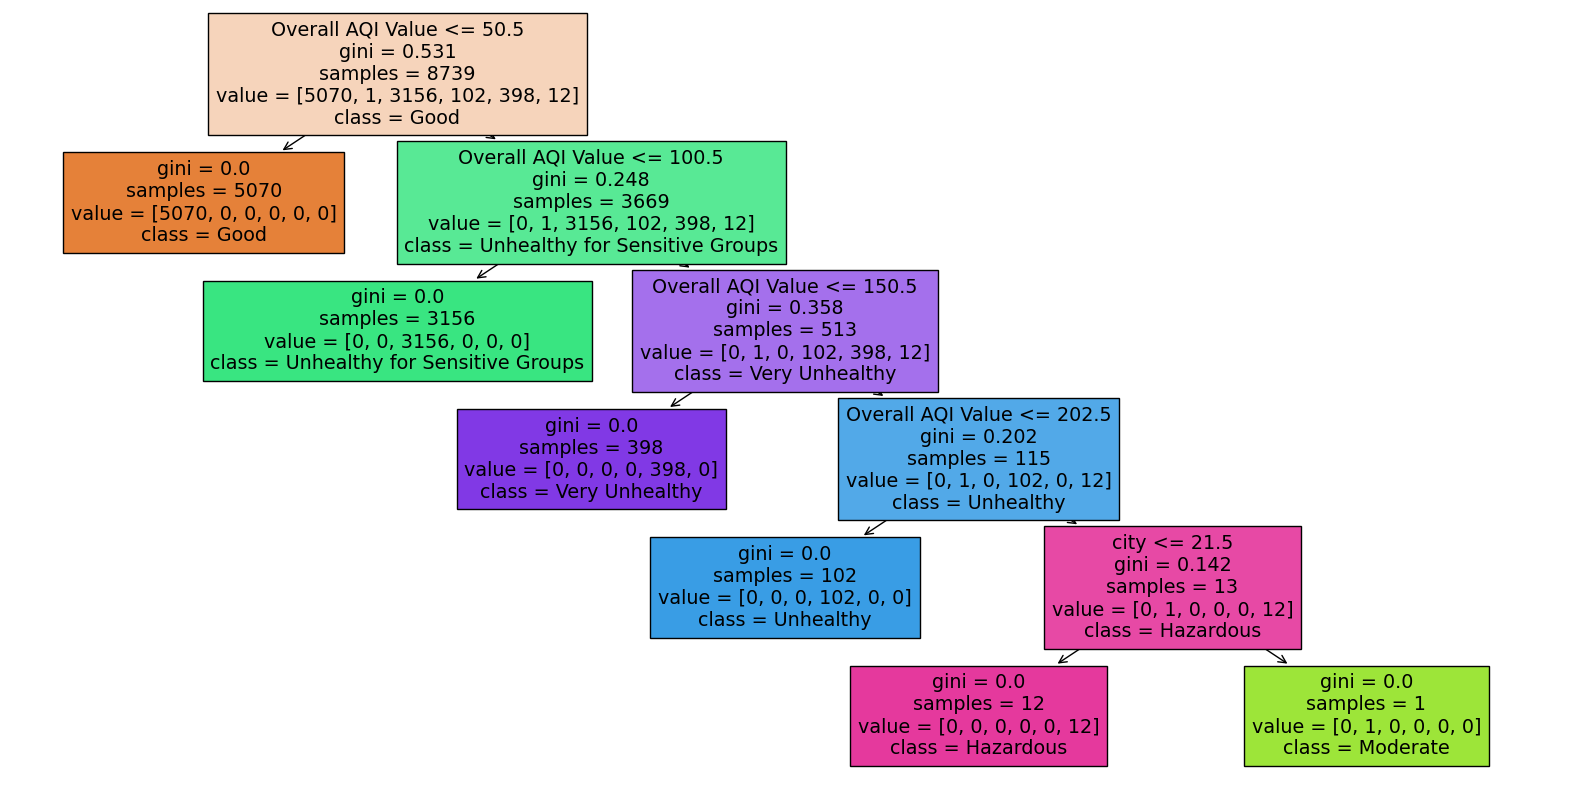

In [32]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names = class_names)
plt.show()